In [ ]:
!pip install pyspark

     |████████████████████████████████| 212.4MB 70kB/s 
     |████████████████████████████████| 204kB 17.3MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880768 sha256=95fa6b769907368a53ae9e24edc4a3dc971eb512bfbca2892d9371d8802ee988
  Stored in directory: /root/.cache/pip/wheels/40/1b/2c/30f43be2627857ab80062bef1527c0128f7b4070b6b2d02139
Successfully built pyspark


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("Exploratory Analysis") \
    .getOrCreate()

In [ ]:
parking = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load('/content/gdrive/My Drive/Big Data/Parking_Violations_Issued_-_Fiscal_Year_2017.csv')
parking

DataFrame[Summons Number: bigint, Plate ID: string, Registration State: string, Plate Type: string, Issue Date: string, Violation Code: int, Vehicle Body Type: string, Vehicle Make: string, Issuing Agency: string, Street Code1: int, Street Code2: int, Street Code3: int, Vehicle Expiration Date: int, Violation Location: int, Violation Precinct: int, Issuer Precinct: int, Issuer Code: int, Issuer Command: string, Issuer Squad: string, Violation Time: string, Time First Observed: string, Violation County: string, Violation In Front Of Or Opposite: string, House Number: string, Street Name: string, Intersecting Street: string, Date First Observed: int, Law Section: int, Sub Division: string, Violation Legal Code: string, Days Parking In Effect    : string, From Hours In Effect: string, To Hours In Effect: string, Vehicle Color: string, Unregistered Vehicle?: int, Vehicle Year: int, Meter Number: string, Feet From Curb: int, Violation Post Code: string, Violation Description: string, No Sta

In [ ]:
parking.show(25)

+--------------+--------+------------------+----------+----------+--------------+-----------------+------------+--------------+------------+------------+------------+-----------------------+------------------+------------------+---------------+-----------+--------------+------------+--------------+-------------------+----------------+---------------------------------+------------+--------------------+-------------------+-------------------+-----------+------------+--------------------+--------------------------+--------------------+------------------+-------------+---------------------+------------+------------+--------------+-------------------+---------------------+---------------------------------+-----------------+------------------------+
|Summons Number|Plate ID|Registration State|Plate Type|Issue Date|Violation Code|Vehicle Body Type|Vehicle Make|Issuing Agency|Street Code1|Street Code2|Street Code3|Vehicle Expiration Date|Violation Location|Violation Precinct|Issuer Precinct|Is

In [ ]:
parking.printSchema()

root
 |-- Summons Number: long (nullable = true)
 |-- Plate ID: string (nullable = true)
 |-- Registration State: string (nullable = true)
 |-- Plate Type: string (nullable = true)
 |-- Issue Date: string (nullable = true)
 |-- Violation Code: integer (nullable = true)
 |-- Vehicle Body Type: string (nullable = true)
 |-- Vehicle Make: string (nullable = true)
 |-- Issuing Agency: string (nullable = true)
 |-- Street Code1: integer (nullable = true)
 |-- Street Code2: integer (nullable = true)
 |-- Street Code3: integer (nullable = true)
 |-- Vehicle Expiration Date: integer (nullable = true)
 |-- Violation Location: integer (nullable = true)
 |-- Violation Precinct: integer (nullable = true)
 |-- Issuer Precinct: integer (nullable = true)
 |-- Issuer Code: integer (nullable = true)
 |-- Issuer Command: string (nullable = true)
 |-- Issuer Squad: string (nullable = true)
 |-- Violation Time: string (nullable = true)
 |-- Time First Observed: string (nullable = true)
 |-- Violation Coun

In [ ]:
# rows
parking.count()

10803028

In [ ]:
# columns
len(parking.columns)

43

# Preprocessing

In [ ]:
# Drop duplicates
parking=parking.dropDuplicates()
parking.count()

10803028

In [ ]:
# Get count of both null and missing values in pyspark

from pyspark.sql.functions import isnan, when, count, col, desc
parking.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in parking.columns]).show()

+--------------+--------+------------------+----------+----------+--------------+-----------------+------------+--------------+------------+------------+------------+-----------------------+------------------+------------------+---------------+-----------+--------------+------------+--------------+-------------------+----------------+---------------------------------+------------+-----------+-------------------+-------------------+-----------+------------+--------------------+--------------------------+--------------------+------------------+-------------+---------------------+------------+------------+--------------+-------------------+---------------------+---------------------------------+-----------------+------------------------+
|Summons Number|Plate ID|Registration State|Plate Type|Issue Date|Violation Code|Vehicle Body Type|Vehicle Make|Issuing Agency|Street Code1|Street Code2|Street Code3|Vehicle Expiration Date|Violation Location|Violation Precinct|Issuer Precinct|Issuer Code

In [ ]:
#drop columns having high percentage of null values

columns_to_drop = ['Double Parking Violation', 'Hydrant Violation','No Standing or Stopping Violation', 'Meter Number', 'Unregistered Vehicle?', 'Violation Legal Code', 'Intersecting Street', 'Time First Observed', 'Issuer Precinct', 'Issuer Code', 'Issuer Command', 'Issuer Squad', 'Violation In Front Of Or Opposite', 'House Number', 'Vehicle Color', 'From Hours In Effect', 'Days Parking In Effect    ','Violation Post Code','To Hours In Effect']
parking = parking.drop(*columns_to_drop)

In [ ]:
#drop the null values in specified columns

parking =parking.na.drop(subset=["Plate ID","Violation Time","Sub Division","Violation Description","Violation Location","Street Name","Violation County"])
parking.show(truncate=False)

+--------------+--------+------------------+----------+----------+--------------+-----------------+------------+--------------+------------+------------+------------+-----------------------+------------------+------------------+--------------+----------------+---------------+-------------------+-----------+------------+------------+--------------+------------------------------+
|Summons Number|Plate ID|Registration State|Plate Type|Issue Date|Violation Code|Vehicle Body Type|Vehicle Make|Issuing Agency|Street Code1|Street Code2|Street Code3|Vehicle Expiration Date|Violation Location|Violation Precinct|Violation Time|Violation County|Street Name    |Date First Observed|Law Section|Sub Division|Vehicle Year|Feet From Curb|Violation Description         |
+--------------+--------+------------------+----------+----------+--------------+-----------------+------------+--------------+------------+------------+------------+-----------------------+------------------+------------------+----------

In [ ]:
# Get count of both null and missing values in pyspark

parking.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in parking.columns]).show()

+--------------+--------+------------------+----------+----------+--------------+-----------------+------------+--------------+------------+------------+------------+-----------------------+------------------+------------------+--------------+----------------+-----------+-------------------+-----------+------------+------------+--------------+---------------------+
|Summons Number|Plate ID|Registration State|Plate Type|Issue Date|Violation Code|Vehicle Body Type|Vehicle Make|Issuing Agency|Street Code1|Street Code2|Street Code3|Vehicle Expiration Date|Violation Location|Violation Precinct|Violation Time|Violation County|Street Name|Date First Observed|Law Section|Sub Division|Vehicle Year|Feet From Curb|Violation Description|
+--------------+--------+------------------+----------+----------+--------------+-----------------+------------+--------------+------------+------------+------------+-----------------------+------------------+------------------+--------------+----------------+----

In [ ]:
#replace column name spaces with _

parking = parking.toDF(*(c.replace(' ', '_') for c in parking.columns))
parking.show(5)

+--------------+--------+------------------+----------+----------+--------------+-----------------+------------+--------------+------------+------------+------------+-----------------------+------------------+------------------+--------------+----------------+---------------+-------------------+-----------+------------+------------+--------------+---------------------+
|Summons_Number|Plate_ID|Registration_State|Plate_Type|Issue_Date|Violation_Code|Vehicle_Body_Type|Vehicle_Make|Issuing_Agency|Street_Code1|Street_Code2|Street_Code3|Vehicle_Expiration_Date|Violation_Location|Violation_Precinct|Violation_Time|Violation_County|    Street_Name|Date_First_Observed|Law_Section|Sub_Division|Vehicle_Year|Feet_From_Curb|Violation_Description|
+--------------+--------+------------------+----------+----------+--------------+-----------------+------------+--------------+------------+------------+------------+-----------------------+------------------+------------------+--------------+-------------

In [ ]:
parking.count()

7611565

In [ ]:
#current no of columns

print(len(parking.columns))

24


In [ ]:
parking.printSchema()

root
 |-- Summons_Number: long (nullable = true)
 |-- Plate_ID: string (nullable = true)
 |-- Registration_State: string (nullable = true)
 |-- Plate_Type: string (nullable = true)
 |-- Issue_Date: string (nullable = true)
 |-- Violation_Code: integer (nullable = true)
 |-- Vehicle_Body_Type: string (nullable = true)
 |-- Vehicle_Make: string (nullable = true)
 |-- Issuing_Agency: string (nullable = true)
 |-- Street_Code1: integer (nullable = true)
 |-- Street_Code2: integer (nullable = true)
 |-- Street_Code3: integer (nullable = true)
 |-- Vehicle_Expiration_Date: integer (nullable = true)
 |-- Violation_Location: integer (nullable = true)
 |-- Violation_Precinct: integer (nullable = true)
 |-- Violation_Time: string (nullable = true)
 |-- Violation_County: string (nullable = true)
 |-- Street_Name: string (nullable = true)
 |-- Date_First_Observed: integer (nullable = true)
 |-- Law_Section: integer (nullable = true)
 |-- Sub_Division: string (nullable = true)
 |-- Vehicle_Year: in

In [ ]:
parking.groupBy('Vehicle_Make').count().sort(desc("count")).show()

+------------+------+
|Vehicle_Make| count|
+------------+------+
|        FORD|961522|
|       TOYOT|786514|
|       HONDA|720591|
|       NISSA|593444|
|       CHEVR|533607|
|       FRUEH|363957|
|       ME/BE|270986|
|       DODGE|265064|
|         BMW|251787|
|        JEEP|235520|
|       INTER|228242|
|       HYUND|193121|
|         GMC|191116|
|       LEXUS|158959|
|       ACURA|135778|
|       VOLKS|126748|
|       CHRYS|119992|
|       INFIN|112998|
|       NS/OT|107281|
|       ISUZU|106905|
+------------+------+
only showing top 20 rows



In [ ]:
#replace the null values in Vehicle_Make by most common value
colNames = ["Vehicle_Make"]
parking = parking.na.fill("FORD", colNames)

In [ ]:
parking.groupBy('Vehicle_Body_Type').count().sort(desc("count")).show()

+-----------------+-------+
|Vehicle_Body_Type|  count|
+-----------------+-------+
|             SUBN|2585390|
|             4DSD|2362605|
|              VAN|1203057|
|             DELV| 567315|
|             2DSD| 226291|
|             PICK| 219864|
|             REFG|  93226|
|             TRAC|  62978|
|             UTIL|  53561|
|             TAXI|  35727|
|             CONV|  33922|
|              BUS|  30339|
|             TRLR|  26228|
|              MCY|  21747|
|               TK|  20054|
|             FLAT|  11112|
|             TR/C|   8275|
|             DUMP|   7762|
|             T/CR|   7450|
|             null|   5301|
+-----------------+-------+
only showing top 20 rows



In [ ]:
#replace the null values in Vehicle_Body_Type by most common value
colNames = ["Vehicle_Body_Type"]
parking = parking.na.fill("SUBN", colNames)

In [ ]:
parking.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in parking.columns]).show()

+--------------+--------+------------------+----------+----------+--------------+-----------------+------------+--------------+------------+------------+------------+-----------------------+------------------+------------------+--------------+----------------+-----------+-------------------+-----------+------------+------------+--------------+---------------------+
|Summons_Number|Plate_ID|Registration_State|Plate_Type|Issue_Date|Violation_Code|Vehicle_Body_Type|Vehicle_Make|Issuing_Agency|Street_Code1|Street_Code2|Street_Code3|Vehicle_Expiration_Date|Violation_Location|Violation_Precinct|Violation_Time|Violation_County|Street_Name|Date_First_Observed|Law_Section|Sub_Division|Vehicle_Year|Feet_From_Curb|Violation_Description|
+--------------+--------+------------------+----------+----------+--------------+-----------------+------------+--------------+------------+------------+------------+-----------------------+------------------+------------------+--------------+----------------+----

# Aggregations

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#create a temporary view of the dataframe
parking.createOrReplaceTempView("parkingtable")

In [ ]:
spark.sql('Select * from parkingtable')

DataFrame[Summons_Number: bigint, Plate_ID: string, Registration_State: string, Plate_Type: string, Issue_Date: string, Violation_Code: int, Vehicle_Body_Type: string, Vehicle_Make: string, Issuing_Agency: string, Street_Code1: int, Street_Code2: int, Street_Code3: int, Vehicle_Expiration_Date: int, Violation_Location: int, Violation_Precinct: int, Violation_Time: string, Violation_County: string, Street_Name: string, Date_First_Observed: int, Law_Section: int, Sub_Division: string, Vehicle_Year: int, Feet_From_Curb: int, Violation_Description: string]

#### 1. Most common parking violations code list with frequencies

In [ ]:
violation_frequencies= spark.sql("SELECT Violation_Code,Violation_Description,count(*) as Violation_Frequency FROM parkingtable GROUP BY Violation_Code,Violation_Description ORDER BY Violation_Frequency desc")
violation_frequencies.show(truncate=False)

+--------------+------------------------------+-------------------+
|Violation_Code|Violation_Description         |Violation_Frequency|
+--------------+------------------------------+-------------------+
|21            |21-No Parking (street clean)  |1230476            |
|38            |38-Failure to Display Muni Rec|1055754            |
|14            |14-No Standing                |810792             |
|37            |37-Expired Muni Meter         |593797             |
|20            |20A-No Parking (Non-COM)      |495566             |
|71            |71A-Insp Sticker Expired (NYS)|454845             |
|40            |40-Fire Hydrant               |422661             |
|19            |19-No Stand (bus stop)        |228920             |
|70            |70A-Reg. Sticker Expired (NYS)|221509             |
|46            |46B-Double Parking (Com-100Ft)|209214             |
|69            |69-Failure to Disp Muni Recpt |183227             |
|46            |46A-Double Parking (Non-COM)  |1

In [ ]:
violation_frequency_pandas = violation_frequencies.toPandas()

<Figure size 432x288 with 0 Axes>

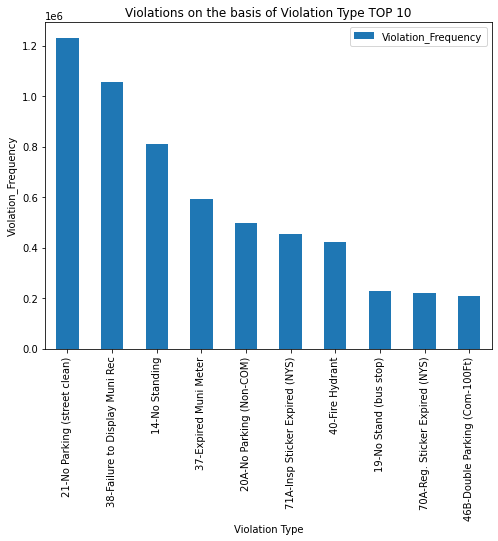

In [ ]:
plt.clf()
plt.rcParams["figure.figsize"] = (8, 6)
violation_frequency_pandas[violation_frequency_pandas.Violation_Description!=0].head(10).plot(x='Violation_Description', y='Violation_Frequency', kind='bar')
plt.title("Violations on the basis of Violation Type TOP 10")
plt.xlabel('Violation Type')
plt.ylabel('Violation_Frequency')
plt.show()

Most occured violation type

In [ ]:
violation_type= spark.sql("SELECT Violation_Description,count(*) as Violation_Frequency FROM parkingtable GROUP BY Violation_Description ORDER BY Violation_Frequency desc")
violation_type.show(truncate=False)

+------------------------------+-------------------+
|Violation_Description         |Violation_Frequency|
+------------------------------+-------------------+
|21-No Parking (street clean)  |1230476            |
|38-Failure to Display Muni Rec|1055754            |
|14-No Standing                |810792             |
|37-Expired Muni Meter         |593797             |
|20A-No Parking (Non-COM)      |495566             |
|71A-Insp Sticker Expired (NYS)|454845             |
|40-Fire Hydrant               |422661             |
|19-No Stand (bus stop)        |228920             |
|70A-Reg. Sticker Expired (NYS)|221509             |
|46B-Double Parking (Com-100Ft)|209214             |
|69-Failure to Disp Muni Recpt |183227             |
|46A-Double Parking (Non-COM)  |166825             |
|31-No Stand (Com. Mtr. Zone)  |144981             |
|47-Double PKG-Midtown         |108756             |
|16A-No Std (Com Veh) Non-COM  |84523              |
|48-Bike Lane                  |75236         

####2. Most common vehicle make that had caused parking violations

In [ ]:
vehicle_make= spark.sql("SELECT Vehicle_Make,count(*) as Violation_Frequency FROM parkingtable GROUP BY Vehicle_Make ORDER BY Violation_Frequency desc")
vehicle_make.show()

+------------+-------------------+
|Vehicle_Make|Violation_Frequency|
+------------+-------------------+
|        FORD|             976567|
|       TOYOT|             786514|
|       HONDA|             720591|
|       NISSA|             593444|
|       CHEVR|             533607|
|       FRUEH|             363957|
|       ME/BE|             270986|
|       DODGE|             265064|
|         BMW|             251787|
|        JEEP|             235520|
|       INTER|             228242|
|       HYUND|             193121|
|         GMC|             191116|
|       LEXUS|             158959|
|       ACURA|             135778|
|       VOLKS|             126748|
|       CHRYS|             119992|
|       INFIN|             112998|
|       NS/OT|             107281|
|       ISUZU|             106905|
+------------+-------------------+
only showing top 20 rows



In [ ]:
vehicle_make_pandas = vehicle_make.toPandas()

<Figure size 576x432 with 0 Axes>

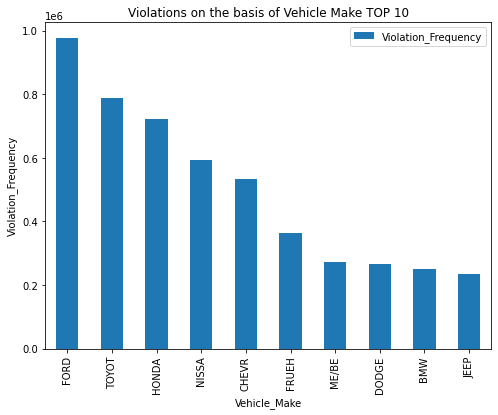

In [ ]:
plt.clf()
plt.rcParams["figure.figsize"] = (8, 6)
vehicle_make_pandas.head(10).plot(x='Vehicle_Make', y='Violation_Frequency', kind='bar')
plt.title("Violations on the basis of Vehicle Make TOP 10")
plt.xlabel('Vehicle_Make')
plt.ylabel('Violation_Frequency')
plt.show()

####3. Vehicles which had done the most parking violations

In [ ]:
vehicle= spark.sql("SELECT Plate_ID,count(*) as Violation_Frequency FROM parkingtable GROUP BY Plate_ID ORDER BY Violation_Frequency desc")
vehicle.show()

+----------+-------------------+
|  Plate_ID|Violation_Frequency|
+----------+-------------------+
|BLANKPLATE|               4929|
|   94905JA|                860|
|   2121796|                846|
|   12359MG|                816|
|   47603MD|                809|
|   2028685|                798|
|   85848MD|                775|
|    AS744T|                771|
|    AT985A|                753|
|   77116MA|                734|
|   37603JH|                732|
|   14881MJ|                726|
|   2380559|                722|
|   14828MJ|                717|
|   2194153|                700|
|   35253MB|                700|
|   63521JM|                698|
|   12125MJ|                671|
|    AT459E|                664|
|    AP580Z|                660|
+----------+-------------------+
only showing top 20 rows



In [ ]:
vehicle_pandas = vehicle.toPandas()

<Figure size 576x432 with 0 Axes>

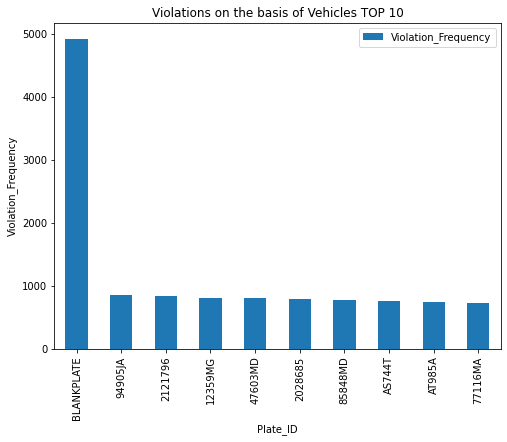

In [ ]:
plt.clf()
plt.rcParams["figure.figsize"] = (8, 6)
vehicle_pandas.head(10).plot(x='Plate_ID', y='Violation_Frequency', kind='bar')
plt.title("Violations on the basis of Vehicles TOP 10")
plt.xlabel('Plate_ID')
plt.ylabel('Violation_Frequency')
plt.show()

####4. Vehicle body type that had caused most parking violations

In [ ]:
vehicle_type= spark.sql("SELECT Vehicle_Body_Type,count(*) as Violation_Frequency FROM parkingtable GROUP BY Vehicle_Body_Type ORDER BY Violation_Frequency desc")
vehicle_type.show()

+-----------------+-------------------+
|Vehicle_Body_Type|Violation_Frequency|
+-----------------+-------------------+
|             SUBN|            2590691|
|             4DSD|            2362605|
|              VAN|            1203057|
|             DELV|             567315|
|             2DSD|             226291|
|             PICK|             219864|
|             REFG|              93226|
|             TRAC|              62978|
|             UTIL|              53561|
|             TAXI|              35727|
|             CONV|              33922|
|              BUS|              30339|
|             TRLR|              26228|
|              MCY|              21747|
|               TK|              20054|
|             FLAT|              11112|
|             TR/C|               8275|
|             DUMP|               7762|
|             T/CR|               7450|
|             SEDN|               4855|
+-----------------+-------------------+
only showing top 20 rows



In [ ]:
vehicle_type_pandas = vehicle_type.toPandas()

<Figure size 576x432 with 0 Axes>

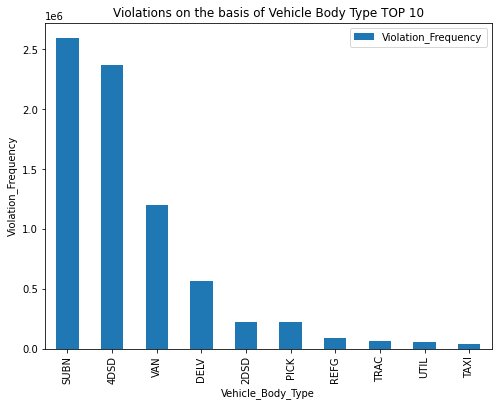

In [ ]:
plt.clf()
plt.rcParams["figure.figsize"] = (8, 6)
vehicle_type_pandas.head(10).plot(x='Vehicle_Body_Type', y='Violation_Frequency', kind='bar')
plt.title("Violations on the basis of Vehicle Body Type TOP 10")
plt.xlabel('Vehicle_Body_Type')
plt.ylabel('Violation_Frequency')
plt.show()

####5. Occurance of parking violations in diffrent precincts

In [ ]:
vio_precint = spark.sql("SELECT Violation_Code,Violation_Precinct,count(*) as Violation_Frequency FROM parkingtable GROUP BY Violation_Code,Violation_Precinct ORDER BY Violation_Frequency desc")  
vio_precint.show()

+--------------+------------------+-------------------+
|Violation_Code|Violation_Precinct|Violation_Frequency|
+--------------+------------------+-------------------+
|            14|                18|              85204|
|            37|                19|              72412|
|            38|                19|              72221|
|            21|               114|              70452|
|            14|                 1|              70047|
|            46|                19|              69893|
|            14|                14|              69681|
|            69|                14|              58024|
|            14|                19|              57148|
|            21|                19|              54671|
|            38|               114|              54620|
|            21|                90|              49755|
|            21|                70|              43806|
|            38|                61|              41660|
|            31|                14|             

In [ ]:
precint = spark.sql("SELECT Violation_Precinct,count(*) as Violation_Frequency FROM parkingtable GROUP BY Violation_Precinct ORDER BY Violation_Frequency desc")  
precint.show()

+------------------+-------------------+
|Violation_Precinct|Violation_Frequency|
+------------------+-------------------+
|                19|             501232|
|                14|             329129|
|                 1|             303711|
|                18|             276717|
|               114|             276079|
|                13|             232660|
|               109|             197338|
|                17|             180840|
|               115|             162554|
|                70|             162539|
|                20|             156067|
|                84|             152952|
|               108|             149372|
|                61|             148331|
|               112|             137412|
|                52|             133124|
|               103|             132298|
|                90|             131444|
|                 6|             126200|
|                66|             124520|
+------------------+-------------------+
only showing top

<Figure size 576x432 with 0 Axes>

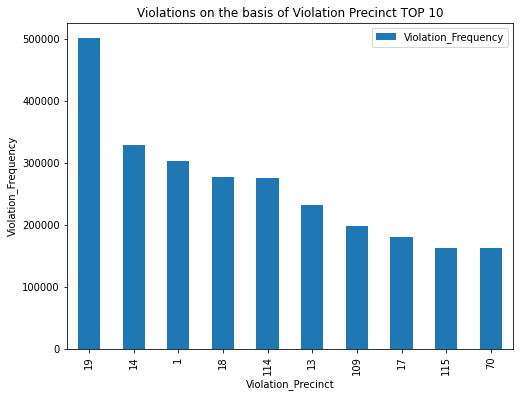

In [ ]:
vio_precinct_pandas = precint.toPandas()
plt.clf()
plt.rcParams["figure.figsize"] = (8, 6)
vio_precinct_pandas.head(10).plot(x='Violation_Precinct', y='Violation_Frequency', kind='bar')
plt.title("Violations on the basis of Violation Precinct TOP 10")
plt.xlabel('Violation_Precinct')
plt.ylabel('Violation_Frequency')
plt.show()

####6. Occurance of parking violations in different locations

In [ ]:
Vio_Location = spark.sql("SELECT Violation_Code,Violation_Location,count(*) as Violation_Frequency FROM parkingtable GROUP BY Violation_Code,Violation_Location ORDER BY Violation_Frequency desc")  
Vio_Location.show()

+--------------+------------------+-------------------+
|Violation_Code|Violation_Location|Violation_Frequency|
+--------------+------------------+-------------------+
|            14|                18|              85204|
|            37|                19|              72412|
|            38|                19|              72221|
|            21|               114|              70452|
|            14|                 1|              70047|
|            46|                19|              69893|
|            14|                14|              69681|
|            69|                14|              58024|
|            14|                19|              57148|
|            21|                19|              54671|
|            38|               114|              54620|
|            21|                90|              49755|
|            21|                70|              43806|
|            38|                61|              41660|
|            31|                14|             

In [ ]:
Location = spark.sql("SELECT Violation_Location,count(*) as Violation_Frequency FROM parkingtable GROUP BY Violation_Location ORDER BY Violation_Frequency desc")  
Location.show()

+------------------+-------------------+
|Violation_Location|Violation_Frequency|
+------------------+-------------------+
|                19|             501232|
|                14|             329129|
|                 1|             303711|
|                18|             276717|
|               114|             276079|
|                13|             232660|
|               109|             197338|
|                17|             180840|
|               115|             162554|
|                70|             162539|
|                20|             156067|
|                84|             152952|
|               108|             149372|
|                61|             148331|
|               112|             137412|
|                52|             133124|
|               103|             132298|
|                90|             131444|
|                 6|             126200|
|                66|             124520|
+------------------+-------------------+
only showing top

<Figure size 576x432 with 0 Axes>

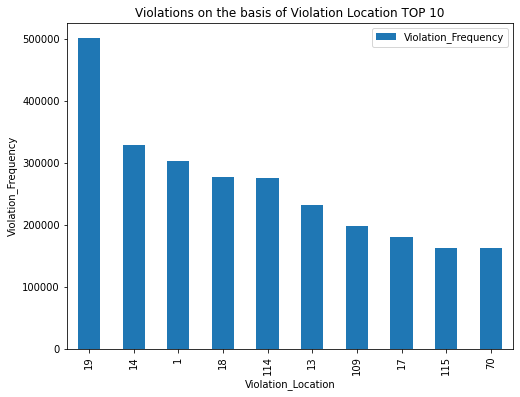

In [ ]:
Vio_Location_pandas = Location.toPandas()
plt.clf()
plt.rcParams["figure.figsize"] = (8, 6)
Vio_Location_pandas.head(10).plot(x='Violation_Location', y='Violation_Frequency', kind='bar')
plt.title("Violations on the basis of Violation Location TOP 10")
plt.xlabel('Violation_Location')
plt.ylabel('Violation_Frequency')
plt.show()

####7. Parking violations and month

In [ ]:
from pyspark.sql.functions import unix_timestamp,from_unixtime

In [ ]:
Vio_Month = spark.sql("SELECT Violation_Code,month(from_unixtime(unix_timestamp(Issue_Date,'MM/dd/yyyy'))) as Month,count(*) as Violation_Frequency FROM parkingtable GROUP BY Violation_Code,Month ORDER BY Violation_Frequency desc")  
Vio_Month.show()

+--------------+-----+-------------------+
|Violation_Code|Month|Violation_Frequency|
+--------------+-----+-------------------+
|            21|    5|             126900|
|            21|    6|             126862|
|            21|    9|             110464|
|            21|    8|             110354|
|            21|    3|             109148|
|            38|   10|             101264|
|            21|   11|             100165|
|            38|    3|              99232|
|            21|   12|              98857|
|            21|    1|              98218|
|            38|    1|              94946|
|            38|    6|              94806|
|            21|    2|              93810|
|            38|    9|              92154|
|            38|    2|              91318|
|            21|    4|              90675|
|            38|   11|              88759|
|            38|    4|              85938|
|            21|    7|              85880|
|            38|    5|              84515|
+----------

In [ ]:
Basedon_Month = spark.sql("SELECT month(from_unixtime(unix_timestamp(Issue_Date,'MM/dd/yyyy'))) as Month,count(*) as Violation_Frequency FROM parkingtable GROUP BY Month ORDER BY Month ")  
Basedon_Month.show()

+-----+-------------------+
|Month|Violation_Frequency|
+-----+-------------------+
|    1|             617426|
|    2|             608825|
|    3|             696321|
|    4|             672702|
|    5|             730222|
|    6|             762156|
|    7|             501115|
|    8|             602139|
|    9|             655768|
|   10|             659850|
|   11|             606948|
|   12|             498093|
+-----+-------------------+



<Figure size 576x432 with 0 Axes>

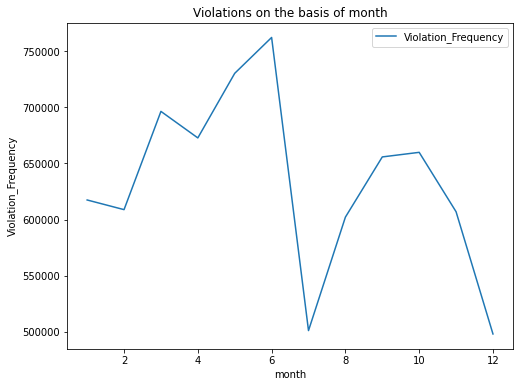

In [ ]:
Basedon_Month=Basedon_Month.toPandas()
plt.clf()
Basedon_Month.plot(x= 'Month', y='Violation_Frequency', kind='line')
plt.title("Violations on the basis of month")
plt.xlabel('month')
plt.ylabel('Violation_Frequency')
plt.show()

####8. Parking violations and Day

In [ ]:
def get_weekday(date):
    import datetime
    import calendar
    month, day, year = (int(x) for x in date.split('/'))    
    weekday = datetime.date(year, month, day)
    return calendar.day_name[weekday.weekday()]

spark.udf.register('get_weekday', get_weekday)

<function __main__.get_weekday>

In [ ]:
Vio_Day = spark.sql("SELECT Violation_Code, get_weekday(Issue_Date) as Day,count(*) as Violation_Frequency FROM parkingtable GROUP BY Violation_Code,Day ORDER BY Violation_Frequency desc")  
Vio_Day.show()

+--------------+---------+-------------------+
|Violation_Code|      Day|Violation_Frequency|
+--------------+---------+-------------------+
|            21|   Friday|             292226|
|            21| Thursday|             286369|
|            21|  Tuesday|             249583|
|            38| Saturday|             209246|
|            21|   Monday|             196175|
|            38|Wednesday|             185139|
|            38|  Tuesday|             172673|
|            38| Thursday|             170982|
|            38|   Friday|             166972|
|            38|   Monday|             150740|
|            14|Wednesday|             148425|
|            14|  Tuesday|             140971|
|            14| Thursday|             137109|
|            14|   Friday|             134652|
|            14|   Monday|             121845|
|            21|Wednesday|             121598|
|            37|Wednesday|             117838|
|            37|  Tuesday|             108672|
|            

In [ ]:
Basedon_Day = spark.sql("SELECT get_weekday(Issue_Date) as Day,count(*) as Violation_Frequency FROM parkingtable GROUP BY Day ORDER BY Day")  
Basedon_Day.show()

+---------+-------------------+
|      Day|Violation_Frequency|
+---------+-------------------+
|   Friday|            1318278|
|   Monday|            1121719|
| Saturday|             892948|
|   Sunday|             265697|
| Thursday|            1371939|
|  Tuesday|            1348720|
|Wednesday|            1292264|
+---------+-------------------+



<Figure size 576x432 with 0 Axes>

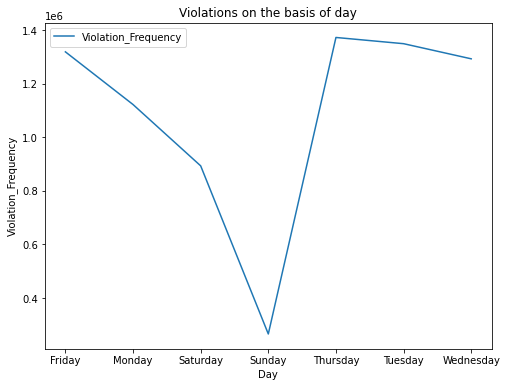

In [ ]:
Basedon_Day_for_plot = Basedon_Day.toPandas()
plt.clf()
Basedon_Day_for_plot.plot(x= 'Day', y='Violation_Frequency', kind='line')
plt.title("Violations on the basis of day")
plt.xlabel('Day')
plt.ylabel('Violation_Frequency')
plt.show()

####9. Parking violations and time

In [ ]:
Vio_Time = spark.sql("SELECT Violation_Code,Violation_Time,count(*) as Violation_Frequency FROM parkingtable GROUP BY Violation_Code,Violation_Time ORDER BY Violation_Frequency desc")  
Vio_Time.show()

+--------------+--------------+-------------------+
|Violation_Code|Violation_Time|Violation_Frequency|
+--------------+--------------+-------------------+
|            21|         0836A|              15383|
|            21|         1136A|              12262|
|            21|         0839A|              10758|
|            21|         0838A|              10713|
|            21|         0936A|              10603|
|            21|         0840A|              10441|
|            21|         0837A|              10336|
|            21|         0841A|              10112|
|            21|         0806A|               9652|
|            21|         0842A|               9592|
|            21|         0906A|               9571|
|            21|         1139A|               9570|
|            21|         1140A|               9554|
|            21|         0843A|               9444|
|            21|         1138A|               9334|
|            21|         1141A|               9028|
|           

In [ ]:
Violation_TimeInterval=spark.sql("SELECT  Violation_Code,case when substring(Violation_Time,1,2) in ('00','01','02','03','04','05','12') and upper(substring(Violation_Time,-1))='A' then '12.00AM - 06.00AM' when substring(Violation_Time,1,2) in ('06','07','08','09','10','11') and upper(substring(Violation_Time,-1))='A' then '06.00AM - 12.00AM' when substring(Violation_Time,1,2) in ('12','00','01','02','03','04','05') and upper(substring(Violation_Time,-1))='P' then '12.00PM - 06.00PM' when substring(Violation_Time,1,2) in ('06','07','08','09','10','11') and upper(substring(Violation_Time,-1))='P' then '06.00PM - 12.00PM' else null end as Violation_Time_bin,count(*) as Violation_Frequency from parkingtable where Violation_Time is not null or (length(Violation_Time)=5 and upper(substring(Violation_Time,-1)) in ('A','P') and substring(Violation_Time,1,2) in ('00','01','02','03','04','05','06','07', '08','09','10','11','12')) GROUP BY Violation_Time_bin,Violation_Code ORDER BY Violation_Frequency desc")
Violation_TimeInterval.show()

+--------------+------------------+-------------------+
|Violation_Code|Violation_Time_bin|Violation_Frequency|
+--------------+------------------+-------------------+
|            21| 06.00AM - 12.00AM|            1056143|
|            38| 12.00PM - 06.00PM|             630802|
|            37| 12.00PM - 06.00PM|             461206|
|            14| 06.00AM - 12.00AM|             370320|
|            14| 12.00PM - 06.00PM|             349590|
|            38| 06.00AM - 12.00AM|             346125|
|            20| 12.00PM - 06.00PM|             272074|
|            71| 12.00PM - 06.00PM|             254149|
|            71| 06.00AM - 12.00AM|             224360|
|            20| 06.00AM - 12.00AM|             223478|
|            46| 12.00PM - 06.00PM|             216264|
|            40| 06.00AM - 12.00AM|             192201|
|            40| 12.00PM - 06.00PM|             152449|
|            46| 06.00AM - 12.00AM|             142281|
|            70| 12.00PM - 06.00PM|             

In [ ]:
bins=spark.sql("SELECT  Violation_Code,case when substring(Violation_Time,1,2) in ('00','01','02','03','04','05','12') and upper(substring(Violation_Time,-1))='A' then '12.00AM - 06.00AM' when substring(Violation_Time,1,2) in ('06','07','08','09','10','11') and upper(substring(Violation_Time,-1))='A' then '06.00AM - 12.00AM' when substring(Violation_Time,1,2) in ('12','00','01','02','03','04','05') and upper(substring(Violation_Time,-1))='P' then '12.00PM - 06.00PM' when substring(Violation_Time,1,2) in ('06','07','08','09','10','11') and upper(substring(Violation_Time,-1))='P' then '06.00PM - 12.00PM' else null end as Violation_Time_bin from parkingtable where Violation_Time is not null or (length(Violation_Time)=5 and upper(substring(Violation_Time,-1)) in ('A','P') and substring(Violation_Time,1,2) in ('00','01','02','03','04','05','06','07', '08','09','10','11','12'))")


In [ ]:
bins.createOrReplaceTempView("timebinstable")

In [ ]:
Vio_TimeOfDay = spark.sql("SELECT Violation_Time_bin,count(*) as Violation_Frequency FROM timebinstable GROUP BY Violation_Time_bin ORDER BY Violation_Frequency")  
Vio_TimeOfDay.show()

+------------------+-------------------+
|Violation_Time_bin|Violation_Frequency|
+------------------+-------------------+
| 12.00AM - 06.00AM|             229208|
| 06.00PM - 12.00PM|             383437|
| 12.00PM - 06.00PM|            3447214|
| 06.00AM - 12.00AM|            3551706|
+------------------+-------------------+



<Figure size 576x432 with 0 Axes>

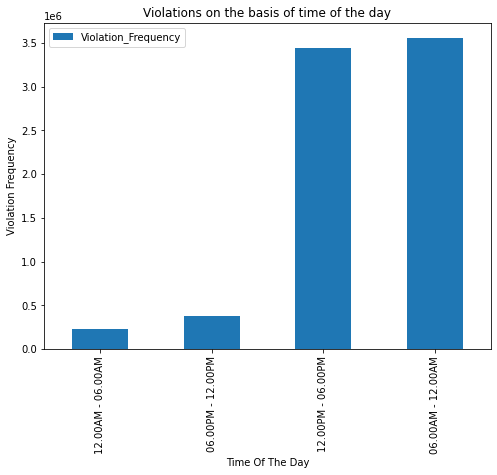

In [ ]:
Time_of_Day_for_plot = Vio_TimeOfDay.toPandas()
plt.clf()
Time_of_Day_for_plot.plot(x= 'Violation_Time_bin', y='Violation_Frequency', kind='bar')
plt.title("Violations on the basis of time of the day")
plt.xlabel('Time Of The Day')
plt.ylabel('Violation Frequency')
plt.show()

### Merge Data sets for Prediction

In [ ]:
parking2017 = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load('/content/gdrive/My Drive/Big Data/Parking_Violations_Issued_-_Fiscal_Year_2017.csv')
parking2016 = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load('/content/gdrive/My Drive/Big Data/Parking_Violations_Issued_-_Fiscal_Year_2016.csv')
parking2015 = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load('/content/gdrive/My Drive/Big Data/Parking_Violations_Issued_-_Fiscal_Year_2015.csv')
parking2014 = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load('/content/gdrive/My Drive/Big Data/Parking_Violations_Issued_-_Fiscal_Year_2014__August_2013___June_2014_.csv')

In [ ]:
parking2017_Col_change= parking2017.toDF(*(c.replace(' ', '_') for c in parking2017.columns))
parking2016_Col_change= parking2016.toDF(*(c.replace(' ', '_') for c in parking2016.columns))
parking2015_Col_change= parking2015.toDF(*(c.replace(' ', '_') for c in parking2015.columns))
parking2014_Col_change= parking2014.toDF(*(c.replace(' ', '_') for c in parking2014.columns))

In [ ]:
from pyspark.sql.functions import unix_timestamp, from_unixtime
parking2017_Col_change.createOrReplaceTempView("parkingtable2017")
parking2016_Col_change.createOrReplaceTempView("parkingtable2016")
parking2015_Col_change.createOrReplaceTempView("parkingtable2015")
parking2014_Col_change.createOrReplaceTempView("parkingtable2014")

In [ ]:
parkingtable2017=spark.sql("SELECT Issue_Date, year(from_unixtime(unix_timestamp(Issue_Date, 'MM/dd/yyy'))) as year, month(from_unixtime(unix_timestamp(Issue_Date, 'MM/dd/yyy'))) as month, day(from_unixtime(unix_timestamp(Issue_Date, 'MM/dd/yyy'))) as day,Violation_Location, Violation_Code , case when substring(Violation_Time,1,2) in ('00','01','02','03','04','05','12') and upper(substring(Violation_Time,-1))='A' then '12.00AM - 06.00AM' when substring(Violation_Time,1,2) in ('06','07','08','09','10','11') and upper(substring(Violation_Time,-1))='A' then '06.00AM - 12.00AM' when substring(Violation_Time,1,2) in ('12','00','01','02','03','04','05') and upper(substring(Violation_Time,-1))='P' then '12.00PM - 06.00PM' when substring(Violation_Time,1,2) in ('06','07','08','09','10','11') and upper(substring(Violation_Time,-1))='P' then '06.00PM - 12.00PM' else null end as Violation_Time_bin from parkingtable2017 where Violation_Time is not null or (length(Violation_Time)=5 and upper(substring(Violation_Time,-1)) in ('A','P') and substring(Violation_Time,1,2) in ('00','01','02','03','04','05','06','07', '08','09','10','11','12'))")
parkingtable2016=spark.sql("SELECT Issue_Date, year(from_unixtime(unix_timestamp(Issue_Date, 'MM/dd/yyy'))) as year, month(from_unixtime(unix_timestamp(Issue_Date, 'MM/dd/yyy'))) as month, day(from_unixtime(unix_timestamp(Issue_Date, 'MM/dd/yyy'))) as day,Violation_Location, Violation_Code , case when substring(Violation_Time,1,2) in ('00','01','02','03','04','05','12') and upper(substring(Violation_Time,-1))='A' then '12.00AM - 06.00AM' when substring(Violation_Time,1,2) in ('06','07','08','09','10','11') and upper(substring(Violation_Time,-1))='A' then '06.00AM - 12.00AM' when substring(Violation_Time,1,2) in ('12','00','01','02','03','04','05') and upper(substring(Violation_Time,-1))='P' then '12.00PM - 06.00PM' when substring(Violation_Time,1,2) in ('06','07','08','09','10','11') and upper(substring(Violation_Time,-1))='P' then '06.00PM - 12.00PM' else null end as Violation_Time_bin from parkingtable2016 where Violation_Time is not null or (length(Violation_Time)=5 and upper(substring(Violation_Time,-1)) in ('A','P') and substring(Violation_Time,1,2) in ('00','01','02','03','04','05','06','07', '08','09','10','11','12'))")
parkingtable2015=spark.sql("SELECT Issue_Date, year(from_unixtime(unix_timestamp(Issue_Date, 'MM/dd/yyy'))) as year, month(from_unixtime(unix_timestamp(Issue_Date, 'MM/dd/yyy'))) as month, day(from_unixtime(unix_timestamp(Issue_Date, 'MM/dd/yyy'))) as day,Violation_Location, Violation_Code , case when substring(Violation_Time,1,2) in ('00','01','02','03','04','05','12') and upper(substring(Violation_Time,-1))='A' then '12.00AM - 06.00AM' when substring(Violation_Time,1,2) in ('06','07','08','09','10','11') and upper(substring(Violation_Time,-1))='A' then '06.00AM - 12.00AM' when substring(Violation_Time,1,2) in ('12','00','01','02','03','04','05') and upper(substring(Violation_Time,-1))='P' then '12.00PM - 06.00PM' when substring(Violation_Time,1,2) in ('06','07','08','09','10','11') and upper(substring(Violation_Time,-1))='P' then '06.00PM - 12.00PM' else null end as Violation_Time_bin from parkingtable2015 where Violation_Time is not null or (length(Violation_Time)=5 and upper(substring(Violation_Time,-1)) in ('A','P') and substring(Violation_Time,1,2) in ('00','01','02','03','04','05','06','07', '08','09','10','11','12'))")
parkingtable2014=spark.sql("SELECT Issue_Date, year(from_unixtime(unix_timestamp(Issue_Date, 'MM/dd/yyy'))) as year, month(from_unixtime(unix_timestamp(Issue_Date, 'MM/dd/yyy'))) as month, day(from_unixtime(unix_timestamp(Issue_Date, 'MM/dd/yyy'))) as day,Violation_Location, Violation_Code , case when substring(Violation_Time,1,2) in ('00','01','02','03','04','05','12') and upper(substring(Violation_Time,-1))='A' then '12.00AM - 06.00AM' when substring(Violation_Time,1,2) in ('06','07','08','09','10','11') and upper(substring(Violation_Time,-1))='A' then '06.00AM - 12.00AM' when substring(Violation_Time,1,2) in ('12','00','01','02','03','04','05') and upper(substring(Violation_Time,-1))='P' then '12.00PM - 06.00PM' when substring(Violation_Time,1,2) in ('06','07','08','09','10','11') and upper(substring(Violation_Time,-1))='P' then '06.00PM - 12.00PM' else null end as Violation_Time_bin from parkingtable2014 where Violation_Time is not null or (length(Violation_Time)=5 and upper(substring(Violation_Time,-1)) in ('A','P') and substring(Violation_Time,1,2) in ('00','01','02','03','04','05','06','07', '08','09','10','11','12'))")

In [ ]:
combinedparkingtable = parkingtable2017.union(parkingtable2016).union(parkingtable2015).union(parkingtable2014)
combinedparkingtable.show()

+----------+----+-----+---+------------------+--------------+------------------+
|Issue_Date|year|month|day|Violation_Location|Violation_Code|Violation_Time_bin|
+----------+----+-----+---+------------------+--------------+------------------+
|07/10/2016|2016|    7| 10|              null|             7| 12.00AM - 06.00AM|
|07/08/2016|2016|    7|  8|              null|             7| 12.00PM - 06.00PM|
|08/23/2016|2016|    8| 23|              null|             5| 12.00PM - 06.00PM|
|06/14/2017|2017|    6| 14|                14|            47| 06.00AM - 12.00AM|
|11/21/2016|2016|   11| 21|                13|            69| 12.00PM - 06.00PM|
|06/13/2017|2017|    6| 13|              null|             7| 06.00PM - 12.00PM|
|08/03/2016|2016|    8|  3|                71|            40| 12.00AM - 06.00AM|
|12/21/2016|2016|   12| 21|              null|            36| 06.00AM - 12.00AM|
|11/21/2016|2016|   11| 21|              null|            36| 06.00AM - 12.00AM|
|10/05/2016|2016|   10|  5| 

In [ ]:
combinedparkingtable.count()

42331306

In [ ]:
combinedparkingtable=combinedparkingtable.dropna()

In [ ]:
#After Removing Null
combinedparkingtable.count()

35923744

In [ ]:
combinedparkingtable.createOrReplaceTempView("combinedparkingtableView")

#### 10. Predict probability of causing parking violations which can be occurred in particular locations for particular months.

### By using Linear Regression

In [ ]:
data_Freq = spark.sql("select year, month,Violation_Location, Violation_Code , count(*) as frequency from combinedparkingtableView where year >= 2014 Group by year,month,Violation_Location, Violation_Code ")
data_month_total_Freq = spark.sql("select year, month,Violation_Location, count(*) as month_frequency from combinedparkingtableView  where year >= 2014  Group by year,month,Violation_Location ")

In [ ]:
data_Freq.show()

+----+-----+------------------+--------------+---------+
|year|month|Violation_Location|Violation_Code|frequency|
+----+-----+------------------+--------------+---------+
|2017|    2|                83|            38|      559|
|2016|    9|                94|            20|      678|
|2016|   10|                68|            37|     1074|
|2017|    3|                62|            21|     3471|
|2016|   12|                 1|            17|      782|
|2017|    4|                13|            37|     1479|
|2016|   12|               103|            21|     1822|
|2017|    6|                67|            71|      549|
|2017|    1|                34|            19|      235|
|2016|   12|                 7|            19|      190|
|2016|    9|                 6|            19|      182|
|2016|   11|                 5|            20|     1795|
|2016|    9|                24|            71|      405|
|2017|    3|                75|            38|      131|
|2017|    6|                26|

In [ ]:
data_month_total_Freq.show()

+----+-----+------------------+---------------+
|year|month|Violation_Location|month_frequency|
+----+-----+------------------+---------------+
|2017|    5|                84|          15267|
|2016|   12|                66|          12696|
|2017|    1|                 2|             17|
|2016|    9|                45|           6022|
|2017|    1|                 8|             12|
|2017|    3|                65|              4|
|2017|    6|                89|              4|
|2017|    4|                11|              3|
|2016|    8|               126|              1|
|2017|    3|                91|              5|
|2014|    2|                10|          10231|
|2014|    4|               112|          15309|
|2014|   12|                17|          15064|
|2015|    6|               114|          32715|
|2015|    7|               104|           9187|
|2015|    9|                42|           2776|
|2016|    6|               102|           5140|
|2017|    9|                73|         

In [ ]:
import pyspark.sql.functions as F
data_with_probability = data_Freq.join(data_month_total_Freq, (data_Freq.Violation_Location == data_month_total_Freq.Violation_Location) & (data_Freq.year == data_month_total_Freq.year)& (data_Freq.month == data_month_total_Freq.month))\
    .withColumn("violation_Probability", (F.col("frequency") / F.col("month_frequency")))\
    .drop(data_month_total_Freq.month_frequency).drop(data_Freq.frequency).drop(data_month_total_Freq.Violation_Location).drop(data_month_total_Freq.year).drop(data_month_total_Freq.month)

In [ ]:
data_with_probability.show()

+--------------+----+-----+------------------+---------------------+
|Violation_Code|year|month|Violation_Location|violation_Probability|
+--------------+----+-----+------------------+---------------------+
|            11|2014|    2|                10| 2.932264685758968E-4|
|            17|2014|    2|                10| 0.017202619489785943|
|            31|2014|    2|                10|  0.03147297429381292|
|            39|2014|    2|                10|  9.77421561919656E-5|
|            60|2014|    2|                10| 0.001270648030495...|
|            27|2014|    2|                10|  9.77421561919656E-5|
|            15|2014|    2|                10|  9.77421561919656E-5|
|            16|2014|    2|                10|  0.07320887498778222|
|            19|2014|    2|                10|  0.02551070276610302|
|            35|2014|    2|                10| 0.002052585280031...|
|            66|2014|    2|                10| 8.796794057276903E-4|
|            82|2014|    2|       

In [ ]:
data_with_probability.count()

158273

In [ ]:
from pyspark.ml.feature import OneHotEncoder
onehotencoder_qualification_vector = OneHotEncoder(inputCol="month", outputCol="month_one")
df11 = onehotencoder_qualification_vector.fit(data_with_probability).transform(data_with_probability)

onehotencoder_qualification_vector = OneHotEncoder(inputCol="Violation_Location", outputCol="Violation_Location_one")
df12 = onehotencoder_qualification_vector.fit(df11).transform(df11)

onehotencoder_qualification_vector = OneHotEncoder(inputCol="Violation_Code", outputCol="Violation_Code_one")
df13 = onehotencoder_qualification_vector.fit(df12).transform(df12)

In [ ]:
# Assemble all the features with VectorAssembler
required_features = ['year','month_one','Violation_Location_one','Violation_Code_one']

from pyspark.ml.feature import VectorAssembler

numericCols = [] #['violation_Probability']
assemblerInputs = [c  for c in required_features] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol='features')

transformed_data = assembler.transform(df13)
transformed_data.show(5)

+--------------+----+-----+------------------+---------------------+--------------+----------------------+------------------+--------------------+
|Violation_Code|year|month|Violation_Location|violation_Probability|     month_one|Violation_Location_one|Violation_Code_one|            features|
+--------------+----+-----+------------------+---------------------+--------------+----------------------+------------------+--------------------+
|            11|2014|    2|                10| 2.932264685758968E-4|(12,[2],[1.0])|      (994,[10],[1.0])|   (99,[11],[1.0])|(1106,[0,3,23,101...|
|            17|2014|    2|                10| 0.017202619489785943|(12,[2],[1.0])|      (994,[10],[1.0])|   (99,[17],[1.0])|(1106,[0,3,23,102...|
|            31|2014|    2|                10|  0.03147297429381292|(12,[2],[1.0])|      (994,[10],[1.0])|   (99,[31],[1.0])|(1106,[0,3,23,103...|
|            39|2014|    2|                10|  9.77421561919656E-5|(12,[2],[1.0])|      (994,[10],[1.0])|   (99,[39],

In [ ]:
# Split the data
(training_data, test_data) = transformed_data.randomSplit([0.8,0.2], seed =2020)
print("Training Dataset Count: " + str(training_data.count()))
print("Test Dataset Count: " + str(test_data.count()))

Training Dataset Count: 126511
Test Dataset Count: 31762


In [ ]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='violation_Probability')
lr_model = lr.fit(training_data)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [0.028870992339478097,0.0,-0.020936825338578702,-0.024227021267414207,-0.022382864164961783,-0.021412116787549056,-0.02096899363862236,-0.02016466723333594,-0.0028476993198519713,-0.002435256111138661,-0.00038656007262852156,-0.0005464927978127994,-0.002341127527137037,0.0,-0.9211909432278695,-0.8615861128424315,-0.8307661360518022,-0.8654730315925957,-0.9177695570294054,-0.9208483357220285,-0.9186840894121396,-0.8484228805645418,-0.9188803656399186,-0.9219094611907234,-0.8198700775337303,-0.8592297498868514,-0.9210017851903308,-0.9190718509186577,-0.8518196761301084,-0.8461118102762423,-0.9194497271230572,-0.9214698863842811,-0.9190576927970244,-0.9194260296646576,-0.7489064255788859,-0.9196503599409453,-0.9186777093993928,-0.9164372797868663,-0.9163474158746235,-0.915733943334511,-0.8529920996807764,-0.9180902173899121,-0.754146920841132,-0.9179492196981351,-0.5515045759598152,-0.9126367057936822,-0.9157072307130186,-0.9177841776732907,-0.5553363007951596,-0.69980960414

In [ ]:
model_path = "/content/gdrive/My Drive/data/" + "modelNew"
lr_model.save(model_path)

In [ ]:
lr_predictions = lr_model.transform(test_data)
lr_predictions.select("prediction","violation_Probability","features").show(100)

+--------------------+---------------------+--------------------+
|          prediction|violation_Probability|            features|
+--------------------+---------------------+--------------------+
|-0.01980139431522332| 5.974508762612852E-4|(1106,[0,30,1015]...|
|-0.01995728905144034| 0.002190653212958...|(1106,[0,30,1016]...|
| 0.08689559120691825|  0.02127659574468085|(1106,[0,3,29,101...|
| 0.04980558303564209| 9.825112988799372E-4|(1106,[0,6,97,101...|
|-0.04836005154640...| 0.004984849965790245|(1106,[0,3,23,101...|
|0.016618867135399285| 0.001556420233463...|(1106,[0,7,115,10...|
|-0.02342331206690318| 0.001327668613913...|(1106,[0,30,1018]...|
| 0.04633956002017925| 0.001113512805397262|(1106,[0,6,97,101...|
| 0.09664820097448512|  0.04106733375026058|(1106,[0,4,45,102...|
|   0.190199931728948|   0.1276595744680851|(1106,[0,3,29,102...|
| 0.12163921481731421|  0.05758754863813229|(1106,[0,7,115,10...|
| 0.14397833437082141|  0.05795416805048157|(1106,[0,10,58,10...|
|  0.22575

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="violation_Probability",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)


R Squared (R2) on test data = 0.65004
RMSE: 0.095063
r2: 0.659273


In [ ]:
dataForGrapgh = lr_predictions.select("prediction","violation_Probability","features")

In [ ]:
dataG =dataForGrapgh.toPandas()

In [ ]:
# Necessary imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
accuracy = metrics.r2_score(dataG['violation_Probability'], dataG['prediction'])
print("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.6500396379151459


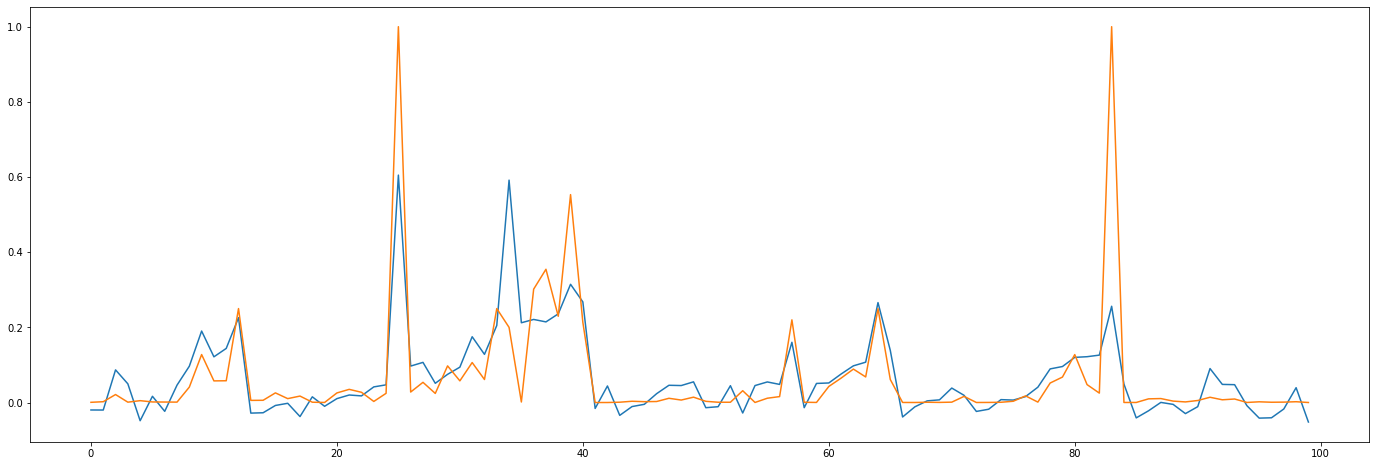

In [ ]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (24, 8)
plt.plot(dataG['prediction'][:100], label = "Pred")  # Load the 500 data points from prediction with label name 'Pred'
plt.plot(dataG['violation_Probability'][:100], label = "Actual") 

In [ ]:
import pandas as pd
test_df =pd.DataFrame({
              'actual':dataG['violation_Probability'],
              'prediction':dataG['prediction'],
              'diff':abs(dataG['violation_Probability']-dataG['prediction'])})

test_df=test_df.sort_values(by='diff')
test_df=test_df.reset_index(drop=True)

### By using  Random Forest 

In [ ]:
from pyspark.ml.feature import QuantileDiscretizer

discretizer = QuantileDiscretizer(numBuckets=5, inputCol="violation_Probability", outputCol="buckets", relativeError=0.01, handleInvalid="error")
result_df = discretizer.fit(df13).transform(df13)
result_df.show()

+--------------+----+-----+------------------+---------------------+--------------+----------------------+------------------+-------+
|Violation_Code|year|month|Violation_Location|violation_Probability|     month_one|Violation_Location_one|Violation_Code_one|buckets|
+--------------+----+-----+------------------+---------------------+--------------+----------------------+------------------+-------+
|            11|2014|    2|                10| 2.932264685758968E-4|(12,[2],[1.0])|      (994,[10],[1.0])|   (99,[11],[1.0])|    0.0|
|            17|2014|    2|                10| 0.017202619489785943|(12,[2],[1.0])|      (994,[10],[1.0])|   (99,[17],[1.0])|    3.0|
|            31|2014|    2|                10|  0.03147297429381292|(12,[2],[1.0])|      (994,[10],[1.0])|   (99,[31],[1.0])|    3.0|
|            39|2014|    2|                10|  9.77421561919656E-5|(12,[2],[1.0])|      (994,[10],[1.0])|   (99,[39],[1.0])|    0.0|
|            60|2014|    2|                10| 0.0012706480304

In [ ]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=["year","month_one", "Violation_Location_one", "Violation_Code_one"], outputCol="features")
output_df = assembler.transform(result_df)
output_df.show(10)

+--------------+----+-----+------------------+---------------------+--------------+----------------------+------------------+-------+--------------------+
|Violation_Code|year|month|Violation_Location|violation_Probability|     month_one|Violation_Location_one|Violation_Code_one|buckets|            features|
+--------------+----+-----+------------------+---------------------+--------------+----------------------+------------------+-------+--------------------+
|            11|2014|    2|                10| 2.932264685758968E-4|(12,[2],[1.0])|      (994,[10],[1.0])|   (99,[11],[1.0])|    0.0|(1106,[0,3,23,101...|
|            17|2014|    2|                10| 0.017202619489785943|(12,[2],[1.0])|      (994,[10],[1.0])|   (99,[17],[1.0])|    3.0|(1106,[0,3,23,102...|
|            31|2014|    2|                10|  0.03147297429381292|(12,[2],[1.0])|      (994,[10],[1.0])|   (99,[31],[1.0])|    3.0|(1106,[0,3,23,103...|
|            39|2014|    2|                10|  9.77421561919656E-5|(1

In [ ]:
#split data set into train, test
(training_data, test_data) = output_df.randomSplit([0.8,0.2], seed =2020)

from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(labelCol='buckets', featuresCol='features', maxDepth=5)
model = rf.fit(training_data)
rf_predictions = model.transform(test_data)

from pyspark.ml.evaluation import MulticlassClassificationEvaluator

multi_evaluator = MulticlassClassificationEvaluator(labelCol = 'buckets', metricName = 'accuracy')
print('Random Forest classifier Accuracy:', multi_evaluator.evaluate(rf_predictions))

Random Forest classifier Accuracy: 0.47396259681380265


In [ ]:
model_path = "/content/gdrive/My Drive/data/" + "Random_10_modelNew"
model.save(model_path)

### By using  Decision Tree

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier

dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'buckets', maxDepth = 5)
dtModel = dt.fit(training_data)
dt_predictions = dtModel.transform(test_data)

from pyspark.ml.evaluation import MulticlassClassificationEvaluator

multi_evaluator = MulticlassClassificationEvaluator(labelCol = 'buckets', metricName = 'accuracy')
print('Decision Tree Accuracy:', multi_evaluator.evaluate(dt_predictions))

Decision Tree Accuracy: 0.3125118065612997


In [ ]:
model_path = "/content/gdrive/My Drive/data/" + "dt_10_modelNew"
dtModel.save(model_path)

#### 11. Predict probability of causing parking violations which can be occurred in particular locations for particular days of a month.

**This Topic 11 is available after the Topic 12** .

#### 12. Predict probability of causing parking violations which can be occurred in particular locations for particular times of the day.

In [ ]:
def get_timebin(bin):
    
    if bin == '12.00AM - 06.00AM':
      return 0
    if bin == '06.00AM - 12.00AM':
      return 1
    if bin == '12.00PM - 06.00PM':
      return 2
    if bin == '06.00PM - 12.00PM':
      return 3

spark.udf.register('get_timebin', get_timebin)

<function __main__.get_timebin>

In [ ]:
from pyspark.sql.functions import udf,desc
from datetime import datetime
from pyspark.sql.functions import date_format
from pyspark.sql.functions import to_date, date_format
from pyspark.sql.functions import *

In [ ]:
data_Freq = spark.sql("select year, month, day, get_timebin(Violation_Time_bin) as Violation_Time_bin, Violation_Location, Violation_Code , count(*) as frequency from combinedparkingtableView where year >= 2014 Group by year,month,day,Violation_Time_bin,Violation_Location, Violation_Code ")

In [ ]:
data_Freq.dtypes

[('year', 'int'),
 ('month', 'int'),
 ('day', 'int'),
 ('Violation_Time_bin', 'string'),
 ('Violation_Location', 'int'),
 ('Violation_Code', 'int'),
 ('frequency', 'bigint')]

In [ ]:
data_Freq.createOrReplaceTempView("data_Freq")

In [ ]:
data_Freq = spark.sql("SELECT CAST(year AS INTEGER), CAST(month AS INTEGER), CAST(day AS INTEGER), CAST(Violation_Time_bin AS INTEGER), CAST(Violation_Location AS INTEGER), CAST(Violation_Code AS INTEGER), frequency FROM data_Freq")

In [ ]:
data_Freq.dtypes

[('year', 'int'),
 ('month', 'int'),
 ('day', 'int'),
 ('Violation_Time_bin', 'int'),
 ('Violation_Location', 'int'),
 ('Violation_Code', 'int'),
 ('frequency', 'bigint')]

In [ ]:
data_Freq.show(10)

+----+-----+---+------------------+------------------+--------------+---------+
|year|month|day|Violation_Time_bin|Violation_Location|Violation_Code|frequency|
+----+-----+---+------------------+------------------+--------------+---------+
|2016|   10| 22|                 2|               110|            38|       29|
|2017|    4|  5|                 2|               108|            40|       15|
|2017|    4| 26|                 3|                48|            46|        2|
|2016|   10| 11|                 1|                32|            21|       50|
|2017|    2|  8|                 1|                75|            66|        3|
|2017|    1|  3|                 1|                75|            21|      133|
|2016|   12|  9|                 2|                17|             9|      110|
|2016|    7|  7|                 2|               106|            38|       45|
|2016|   12| 12|                 1|                75|            21|      123|
|2016|    9|  6|                 2|     

In [ ]:
data_time_total_Freq = spark.sql("select year, month, day, get_timebin(Violation_Time_bin) as Violation_Time_bin, Violation_Location, count(*) as time_frequency from combinedparkingtableView  where year >= 2014  Group by year,month,day,Violation_Time_bin,Violation_Location")

In [ ]:
data_time_total_Freq.createOrReplaceTempView("data_time_total_Freq")

In [ ]:
data_time_total_Freq.dtypes

[('year', 'int'),
 ('month', 'int'),
 ('day', 'int'),
 ('Violation_Time_bin', 'string'),
 ('Violation_Location', 'int'),
 ('time_frequency', 'bigint')]

In [ ]:
data_time_total_Freq = spark.sql("select CAST(year AS INTEGER), CAST(month AS INTEGER), CAST(day AS INTEGER), CAST(Violation_Time_bin AS INTEGER), CAST(Violation_Location AS INTEGER), time_frequency from data_time_total_Freq")

In [ ]:
data_time_total_Freq.dtypes

[('year', 'int'),
 ('month', 'int'),
 ('day', 'int'),
 ('Violation_Time_bin', 'int'),
 ('Violation_Location', 'int'),
 ('time_frequency', 'bigint')]

In [ ]:
data_time_total_Freq.show(10)

+----+-----+---+------------------+------------------+--------------+
|year|month|day|Violation_Time_bin|Violation_Location|time_frequency|
+----+-----+---+------------------+------------------+--------------+
|2017|    5|  4|                 2|                70|           356|
|2016|    9|  7|                 1|                26|            77|
|2016|   11| 21|                 2|                17|           287|
|2016|    8| 17|                 1|                20|           192|
|2016|   10|  5|                 2|                52|           248|
|2016|   10| 12|                 2|                45|            65|
|2016|    8| 23|                 2|                24|           148|
|2017|    6| 10|                 0|               103|           105|
|2016|    8| 16|                 1|               115|           380|
|2016|    7| 21|                 2|                90|           177|
+----+-----+---+------------------+------------------+--------------+
only showing top 10 

In [ ]:
import pyspark.sql.functions as F
data_with_probability = data_Freq.join(data_time_total_Freq, (data_Freq.Violation_Location == data_time_total_Freq.Violation_Location) & (data_Freq.year == data_time_total_Freq.year)& (data_Freq.month == data_time_total_Freq.month) & (data_Freq.day == data_time_total_Freq.day) & (data_Freq.Violation_Time_bin == data_time_total_Freq.Violation_Time_bin))\
    .withColumn("violation_Probability", (F.col("frequency") / F.col("time_frequency")))\
    .drop(data_time_total_Freq.time_frequency).drop(data_Freq.frequency).drop(data_time_total_Freq.Violation_Location).drop(data_time_total_Freq.year).drop(data_time_total_Freq.month).drop(data_time_total_Freq.day).drop(data_time_total_Freq.Violation_Time_bin)

In [ ]:
data_with_probability.show(10)

+----+-----+---+------------------+------------------+--------------+---------------------+
|year|month|day|Violation_Time_bin|Violation_Location|Violation_Code|violation_Probability|
+----+-----+---+------------------+------------------+--------------+---------------------+
|2014|    1|  6|                 1|                 1|            45| 0.002298850574712...|
|2014|    1|  6|                 1|                 1|            37| 0.016091954022988506|
|2014|    1|  6|                 1|                 1|            53| 0.016091954022988506|
|2014|    1|  6|                 1|                 1|            24| 0.009195402298850575|
|2014|    1|  6|                 1|                 1|            42| 0.011494252873563218|
|2014|    1|  6|                 1|                 1|            70| 0.009195402298850575|
|2014|    1|  6|                 1|                 1|            10| 0.011494252873563218|
|2014|    1|  6|                 1|                 1|             4| 0.00459770

In [ ]:
from pyspark.ml.feature import OneHotEncoder
onehotencoder_qualification_vector = OneHotEncoder(inputCol="month", outputCol="month_one")
df11 = onehotencoder_qualification_vector.fit(data_with_probability).transform(data_with_probability)

onehotencoder_qualification_vector = OneHotEncoder(inputCol="Violation_Location", outputCol="Violation_Location_one")
df12 = onehotencoder_qualification_vector.fit(df11).transform(df11)

onehotencoder_qualification_vector = OneHotEncoder(inputCol="Violation_Code", outputCol="Violation_Code_one")
df13 = onehotencoder_qualification_vector.fit(df12).transform(df12)

onehotencoder_qualification_vector = OneHotEncoder(inputCol="day", outputCol="day_one")
df14 = onehotencoder_qualification_vector.fit(df13).transform(df13)

onehotencoder_qualification_vector = OneHotEncoder(inputCol="year", outputCol="year_one")
df15 = onehotencoder_qualification_vector.fit(df14).transform(df14)

onehotencoder_qualification_vector = OneHotEncoder(inputCol="Violation_Time_bin", outputCol="Violation_Time_bin_one")
df16 = onehotencoder_qualification_vector.fit(df15).transform(df15)

In [ ]:
# Assemble all the features with VectorAssembler
required_features = ['year_one','month_one','day_one','Violation_Time_bin_one','Violation_Location_one','Violation_Code_one']

from pyspark.ml.feature import VectorAssembler

numericCols = [] #['violation_Probability']
assemblerInputs = [c  for c in required_features] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol='features')

transformed_data = assembler.transform(df16)
transformed_data.show(5)

+----+-----+---+------------------+------------------+--------------+---------------------+--------------+----------------------+------------------+--------------+-------------------+----------------------+--------------------+
|year|month|day|Violation_Time_bin|Violation_Location|Violation_Code|violation_Probability|     month_one|Violation_Location_one|Violation_Code_one|       day_one|           year_one|Violation_Time_bin_one|            features|
+----+-----+---+------------------+------------------+--------------+---------------------+--------------+----------------------+------------------+--------------+-------------------+----------------------+--------------------+
|2014|    1|  6|                 1|                 1|            45| 0.002298850574712...|(12,[1],[1.0])|       (994,[1],[1.0])|   (99,[45],[1.0])|(31,[6],[1.0])|(2069,[2014],[1.0])|         (3,[1],[1.0])|(3208,[2014,2070,...|
|2014|    1|  6|                 1|                 1|            37| 0.0160919540229885

In [ ]:
# Split the data
(training_data, test_data) = transformed_data.randomSplit([0.8,0.2], seed =2020)
print("Training Dataset Count: " + str(training_data.count()))
print("Test Dataset Count: " + str(test_data.count()))

Training Dataset Count: 3205995
Test Dataset Count: 800419


In [ ]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='violation_Probability')
lr_model = lr.fit(training_data)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [ ]:
#save the model
model_path = "/content/gdrive/My Drive/data/" + "TimePredictionsModel"
lr_model.save(model_path)

In [ ]:
lr_predictions = lr_model.transform(test_data)
lr_predictions.select("prediction","violation_Probability","features").show(100)

+--------------------+---------------------+--------------------+
|          prediction|violation_Probability|            features|
+--------------------+---------------------+--------------------+
| 0.10808665816314078|                0.125|(3208,[2014,2070,...|
| 0.05834560526062749|                  0.1|(3208,[2014,2070,...|
| 0.08799305595828644|                  0.5|(3208,[2014,2070,...|
| 0.08118185404277645|  0.26436781609195403|(3208,[2014,2070,...|
|0.014213345714999104|  0.17011494252873563|(3208,[2014,2070,...|
|0.014424692072174672| 0.002298850574712...|(3208,[2014,2070,...|
|-0.00278683402013...| 0.011494252873563218|(3208,[2014,2070,...|
|0.054561320755022846|  0.08275862068965517|(3208,[2014,2070,...|
|  0.1689816049138948|  0.15789473684210525|(3208,[2014,2070,...|
| 0.29566785530357875|   0.7034220532319392|(3208,[2014,2070,...|
| 0.09749148424875043| 0.011406844106463879|(3208,[2014,2070,...|
| 0.10512531974278394| 0.007604562737642...|(3208,[2014,2070,...|
| 0.021445

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="violation_Probability",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

R Squared (R2) on test data = 0.396989
RMSE: 0.115238
r2: 0.399310


In [ ]:
dataForGrapgh = lr_predictions.select("prediction","violation_Probability","features")

In [ ]:
dataG =dataForGrapgh.toPandas()

In [ ]:
# Necessary imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
accuracy = metrics.r2_score(dataG['violation_Probability'], dataG['prediction'])
print("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.3969891802453316


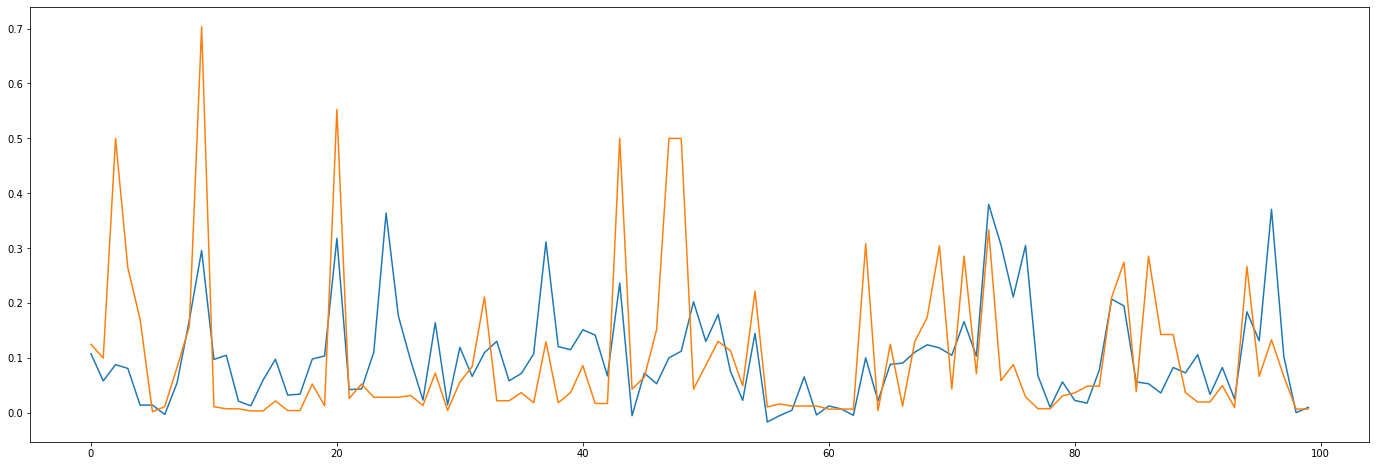

In [ ]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (24, 8)
plt.plot(dataG['prediction'][:100], label = "Pred")  # Load the 500 data points from prediction with label name 'Pred'
plt.plot(dataG['violation_Probability'][:100], label = "Actual") 

#### 11. Predict probability of causing parking violations which can be occurred in particular locations for particular day of a month.





In [ ]:
from pyspark.sql.functions import udf,desc
from datetime import datetime

from pyspark.sql.functions import date_format
from pyspark.sql.functions import to_date, date_format
from functools import reduce  # For Python 3.x
from pyspark.sql import DataFrame
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

from pyspark.ml.feature import OneHotEncoder

from pyspark.ml.regression import LinearRegression

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

from matplotlib import pyplot as plt

from pyspark.sql.functions import *

In [ ]:
from pyspark.sql.functions import unix_timestamp, from_unixtime
parking2017_Col_change.createOrReplaceTempView("parking2017")
parking2016_Col_change.createOrReplaceTempView("parking2016")
parking2015_Col_change.createOrReplaceTempView("parking2015")
parking2014_Col_change.createOrReplaceTempView("parking2014")

In [ ]:
parkingtable2017 = spark.sql("select Issue_Date,Violation_Location,Violation_Code from parking2017")
parkingtable2016 = spark.sql("select Issue_Date,Violation_Location,Violation_Code from parking2016")
parkingtable2015 = spark.sql("select Issue_Date,Violation_Location,Violation_Code from parking2015")
parkingtable2014 = spark.sql("select Issue_Date,Violation_Location,Violation_Code from parking2014")

In [ ]:
from pyspark.sql.functions import unix_timestamp, from_unixtime

combinedparkingtable2 = parkingtable2017.union(parkingtable2016).union(parkingtable2015).union(parkingtable2014)
combinedparkingtable2.show()

+----------+------------------+--------------+
|Issue_Date|Violation_Location|Violation_Code|
+----------+------------------+--------------+
|07/10/2016|              null|             7|
|07/08/2016|              null|             7|
|08/23/2016|              null|             5|
|06/14/2017|                14|            47|
|11/21/2016|                13|            69|
|06/13/2017|              null|             7|
|08/03/2016|                71|            40|
|12/21/2016|              null|            36|
|11/21/2016|              null|            36|
|10/05/2016|              null|             5|
|01/11/2017|               106|            78|
|09/27/2016|                18|            19|
|10/27/2016|              null|            36|
|09/30/2016|                44|            21|
|02/04/2017|                73|            40|
|07/07/2016|               120|            71|
|09/24/2016|              null|             7|
|01/26/2017|                17|            64|
|04/30/2017| 

In [ ]:
combinedparkingtable2=combinedparkingtable2.dropna()

In [ ]:
combinedparkingtable2.createOrReplaceTempView("combinedparkingtableView2")

In [ ]:
data_2014 = spark.sql("select year(from_unixtime(unix_timestamp(Issue_Date, 'MM/dd/yyy'))) as year,month(from_unixtime(unix_timestamp(Issue_Date, 'MM/dd/yyy'))) as month,day(from_unixtime(unix_timestamp(Issue_Date, 'MM/dd/yyy'))) as day,Violation_Location, Violation_Code , count(*) as frequency from combinedparkingtableView2  Group by year,month,day,Violation_Location, Violation_Code order by year,month,day,Violation_Location,Violation_Code ")
data_2014.createOrReplaceTempView("data_2014")
data_2014 = spark.sql("select year,month,day,Violation_Location,Violation_Code,frequency from data_2014 where year >= 2014 ")



In [ ]:
data_2014_day = spark.sql("select year(from_unixtime(unix_timestamp(Issue_Date, 'MM/dd/yyy'))) as year,month(from_unixtime(unix_timestamp(Issue_Date, 'MM/dd/yyy'))) as month,day(from_unixtime(unix_timestamp(Issue_Date, 'MM/dd/yyy'))) as day,Violation_Location,count(*) as totalViolation from combinedparkingtableView2  Group by year,month,day,Violation_Location order by year,month,day,Violation_Location ")
data_2014_day.createOrReplaceTempView("data_2014_day")
data_2014_day= spark.sql("select year,month,day,Violation_Location,totalViolation from data_2014_day where year >= 2014 ")


In [ ]:
import pyspark.sql.functions as F
from pyspark.sql.functions import round, col
df_2014 = data_2014.join(data_2014_day, (data_2014.Violation_Location == data_2014_day.Violation_Location) & (data_2014.year == data_2014_day.year)& (data_2014.month == data_2014_day.month) & (data_2014_day.day == data_2014_day.day))\
    .withColumn("violation_probability", round(F.col("frequency") / F.col("totalViolation"), 5))\
    .drop(data_2014_day.totalViolation).drop(data_2014.frequency).drop(data_2014_day.Violation_Location).drop(data_2014_day.month).drop(data_2014_day.day).drop(data_2014_day.year)


#df_2015.show()

In [ ]:
full_df = df_2014

In [ ]:
from pyspark.sql.functions import countDistinct
df2=full_df.select(countDistinct("Violation_Location"))
df2.show()

+----------------------------------+
|count(DISTINCT Violation_Location)|
+----------------------------------+
|                               661|
+----------------------------------+



In [ ]:
day_encoded = OneHotEncoder(inputCol="day", outputCol="day_one")
df_buck = day_encoded.fit(full_df).transform(full_df)

location_encoded = OneHotEncoder(inputCol="Violation_Location", outputCol="Violation_Location_one")
df_buck1 = location_encoded.fit(df_buck).transform(df_buck)

code_encoded = OneHotEncoder(inputCol="Violation_Code", outputCol="Violation_Code_one")
df_buck2 = code_encoded.fit(df_buck1).transform(df_buck1)

In [ ]:
#for training data
#assembler = VectorAssembler(inputCols=["day_one","month_one","Violation_Location_one","week_one","Violation_Code_one"], outputCol="features")
# Assemble all the features with VectorAssembler
required_features = ["year","month","day_one","Violation_Location_one","Violation_Code_one"]

from pyspark.ml.feature import VectorAssembler

numericCols = [] #['prob']
assemblerInputs = [c  for c in required_features] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol='features')

transformed_data = assembler.transform(df_buck2)

In [ ]:
(training_data, test_data) = transformed_data.randomSplit([0.8,0.2], seed =2020)

In [ ]:
lr = LinearRegression(featuresCol = 'features', labelCol='violation_probability')
lr_model = lr.fit(training_data)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [0.009199549948034355,0.0007121834758366491,0.0,0.00043891759462972885,-0.001373657626029045,-0.0012541678576756916,0.0009234904346694903,0.0007424948972180504,-0.0008608249973083394,-0.001287253171153631,-0.0015896548280358727,-0.001993229177387437,-0.00230404098544258,-0.0013051131599843384,-0.0019100418242700677,-0.0018078659191576938,-0.001058737827023118,-0.0015482714878441717,-0.0013249172606016179,-0.0009946135216185753,0.00020705370346498368,-0.0008100777510756564,-0.0014841745062684792,-0.0023105194208989997,-0.0023394500454352526,-0.0015520103092155132,-0.0016083058720089657,0.0006854011389667825,0.0015418526123608662,-0.0008504570020884737,-0.0017651277843882434,-0.0003909038591258999,-0.0012688237753391803,0.0,-0.9240308961564747,-0.3435724841999254,-0.1373415812582218,-0.19867175134175163,-0.9242477698765481,-0.9224864703347101,-0.9193796993369054,-0.20606491433469465,-0.9223784910594371,-0.9261115158021718,-0.18508710241164344,-0.23908763183936743,-0.9265774

In [ ]:
lr_predictions = lr_model.transform(test_data)
lr_predictions.select("prediction","violation_probability","features").show(100)

+--------------------+---------------------+--------------------+
|          prediction|violation_probability|            features|
+--------------------+---------------------+--------------------+
| 0.02969370166169938|              0.07258|(1126,[0,1,3,104,...|
| 0.01118624063550655|              0.01613|(1126,[0,1,3,104,...|
|0.018751570341478896|                0.125|(1126,[0,1,7,155,...|
|  0.0342962840301233|                 0.25|(1126,[0,1,7,155,...|
| 0.03259878570383634|                 0.25|(1126,[0,1,7,155,...|
|0.037061857398999365|              0.00152|(1126,[0,1,8,103,...|
|  0.6897697205270319|                  1.0|(1126,[0,1,8,45,1...|
| 0.07010131635995975|              0.03951|(1126,[0,1,8,103,...|
|-0.00606009093137061|              0.00318|(1126,[0,1,10,77,...|
|-0.00524607266982...|              0.01274|(1126,[0,1,10,77,...|
|-0.00188672524354...|              0.00318|(1126,[0,1,10,77,...|
|0.020422275060361983|              0.00318|(1126,[0,1,10,77,...|
| 0.213558

In [ ]:
dataForGrapgh = lr_predictions.select("prediction","violation_probability","features")

In [ ]:
dataG =dataForGrapgh.toPandas()

In [ ]:
# Necessary imports: 
accuracy = metrics.r2_score(dataG['violation_probability'], dataG['prediction'])
print("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.5457364595350402


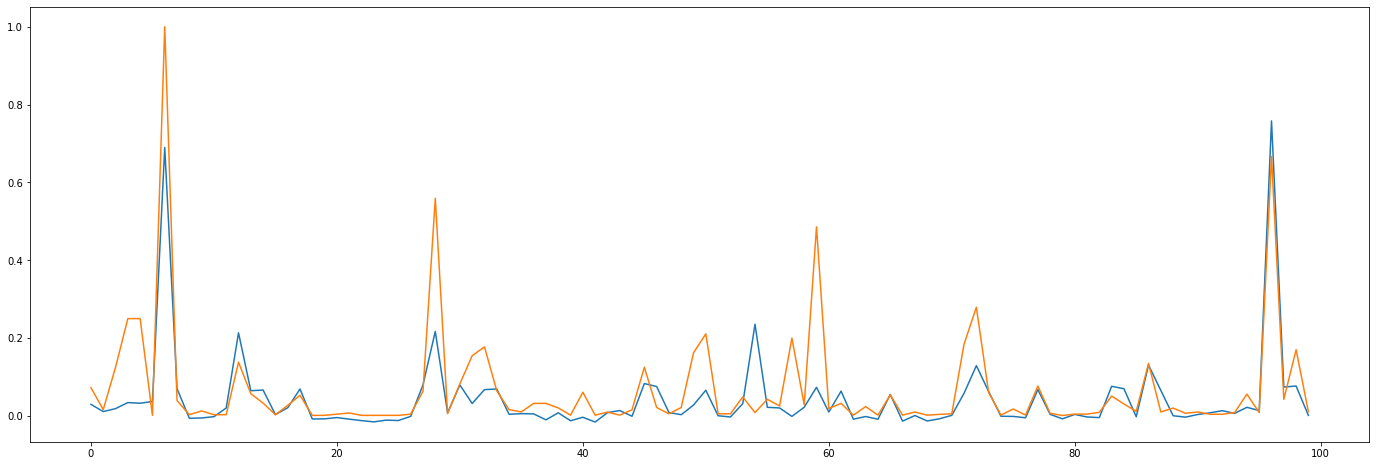

In [ ]:
plt.rcParams["figure.figsize"] = (24, 8)
plt.plot(dataG['prediction'][:100], label = "Pred")  # Load the 500 data points from prediction with label name 'Pred'
plt.plot(dataG['violation_probability'][:100], label = "Actual")